# Importing Libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pycaret.nlp import *

# Loading the Data

In [2]:
df_bg_tmp = pd.read_csv('../datasets/games-cleaned.csv')
df_bg = df_bg_tmp.copy()

# Topic Modeling

In [3]:
bg_nlp = df_bg[['name', 'description']].copy()
bg_nlp = setup(bg_nlp, target = 'description', custom_stopwords = ['player', 'card', 'play', 'game'], session_id=42)

Description,Value
session_id,42
Documents,4609
Vocab Size,17167
Custom Stopwords,True


In [4]:
lda = create_model('lda', num_topics = 6, multi_core = True)
lda_results = assign_model(lda)
lda_results.head()

,name,description,Topic_0,Topic_1,Topic_2,Topic_3,Topic_4,Topic_5,Dominant_Topic,Perc_Dominant_Topic
0,Pandemic,pandemic several virulent disease break simult...,0.348843,0.001420,0.001413,0.367138,0.112152,0.169034,Topic 3,0.37
1,Carcassonne,draw place tile piece southern french landscap...,0.040011,0.950097,0.002473,0.002464,0.002466,0.002490,Topic 1,0.95
2,Catan,formerly try dominant settlement city road tur...,0.499106,0.497662,0.000803,0.000808,0.000806,0.000815,Topic 0,0.50
3,7 Wonders,leader great city ancient world gather resourc...,0.667067,0.310329,0.017687,0.001637,0.001642,0.001639,Topic 0,0.67
4,Dominion,parent ruler small pleasant kingdom river ever...,0.346810,0.142122,0.059823,0.001638,0.001648,0.447959,Topic 5,0.45


In [5]:
lda_results['Dominant_Topic'].value_counts()

Topic 0    1424
Topic 5    1060
Topic 1    1014
Topic 4     683
Topic 2     246
Topic 3     182
Name: Dominant_Topic, dtype: int64

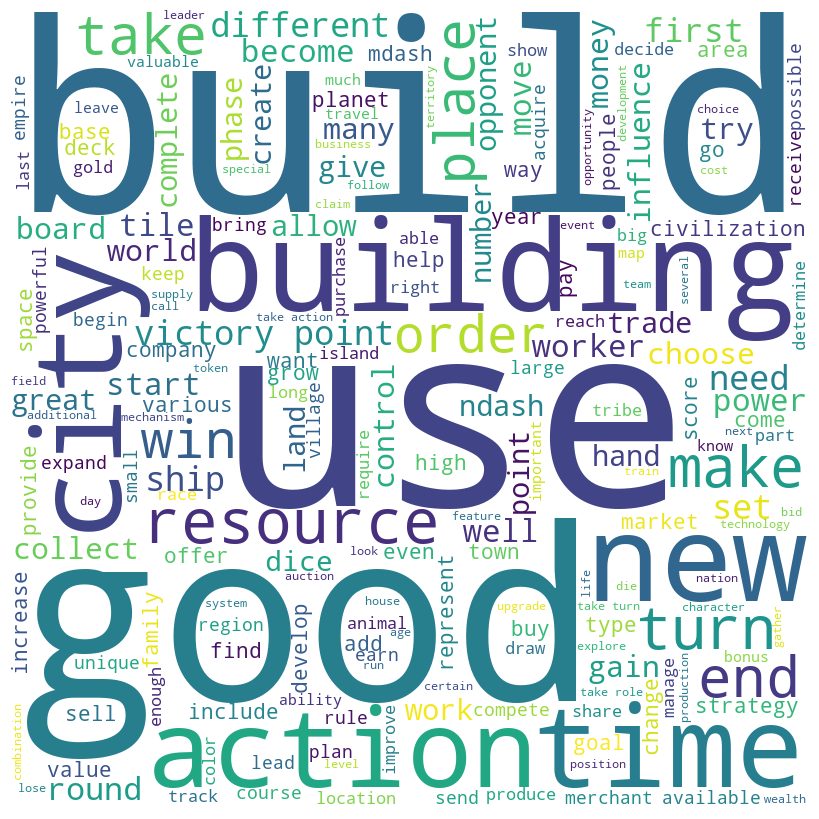

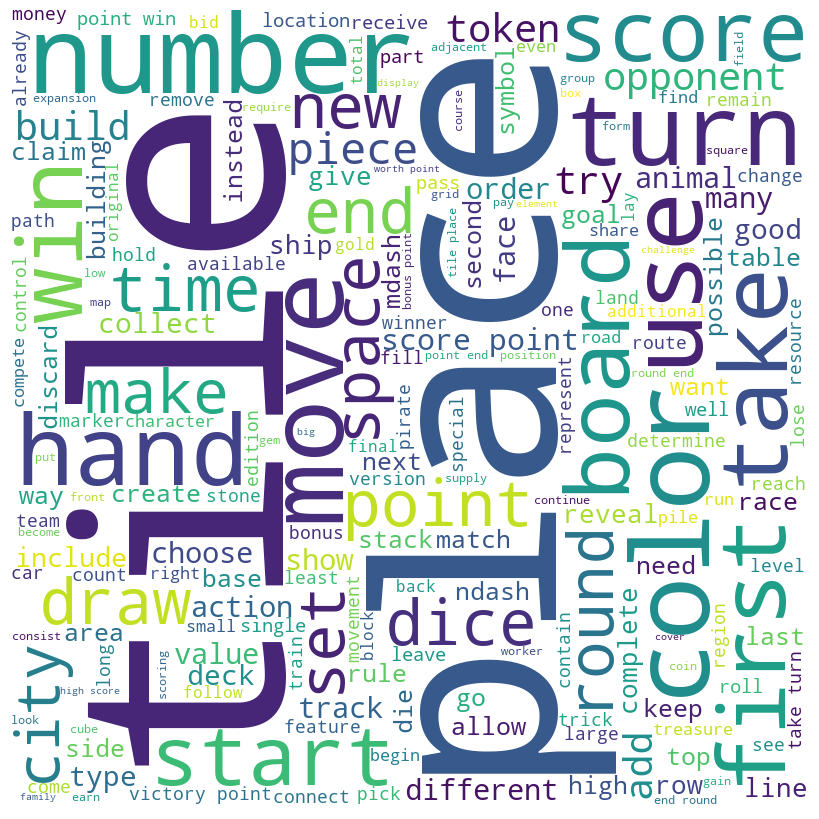

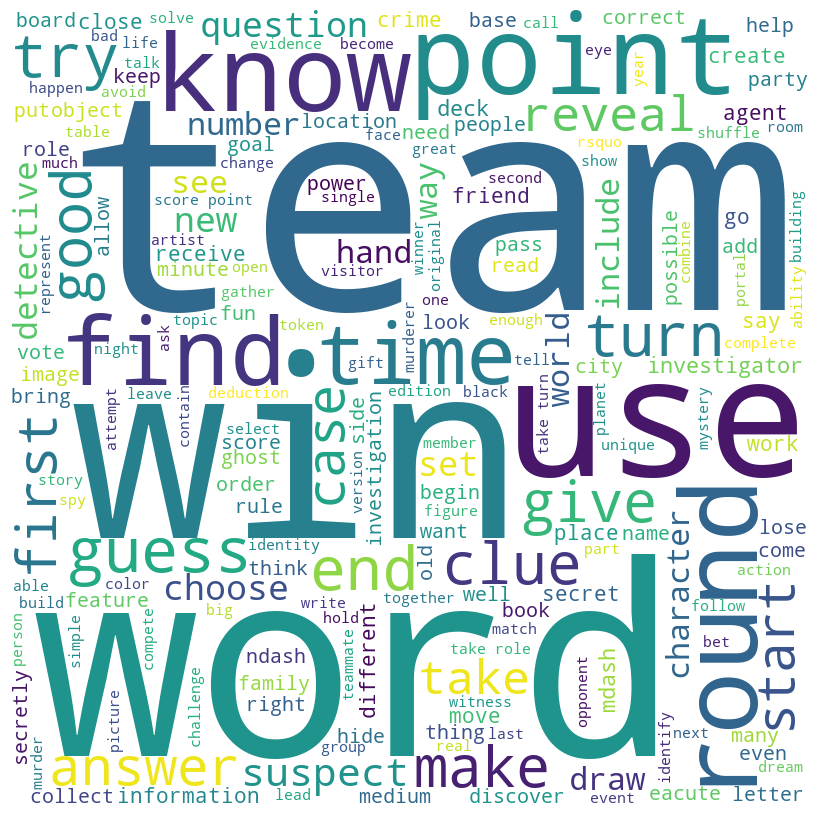

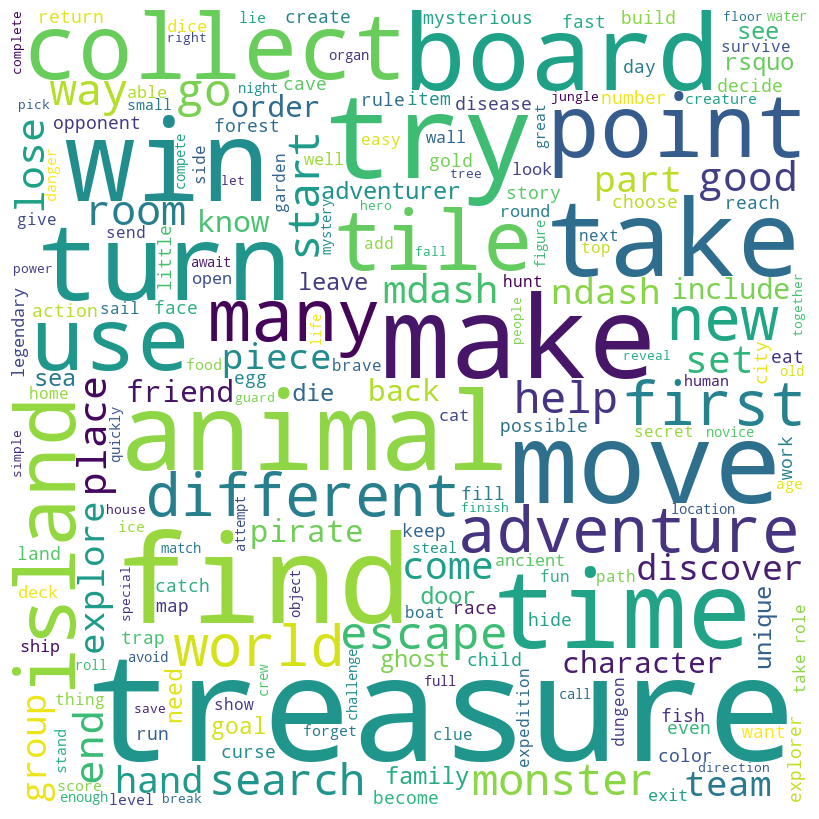

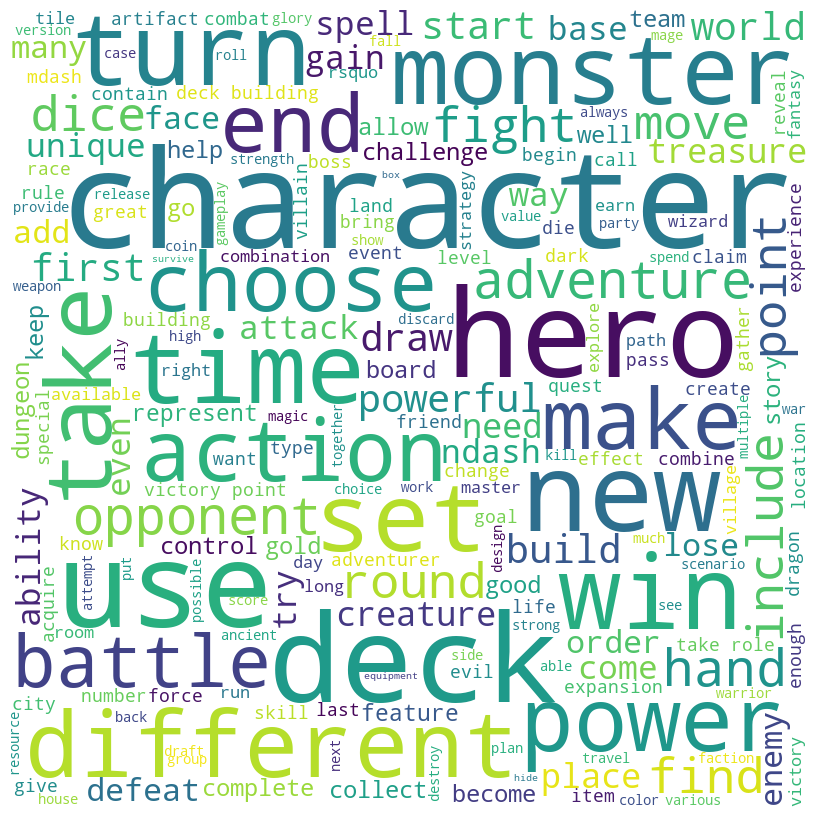

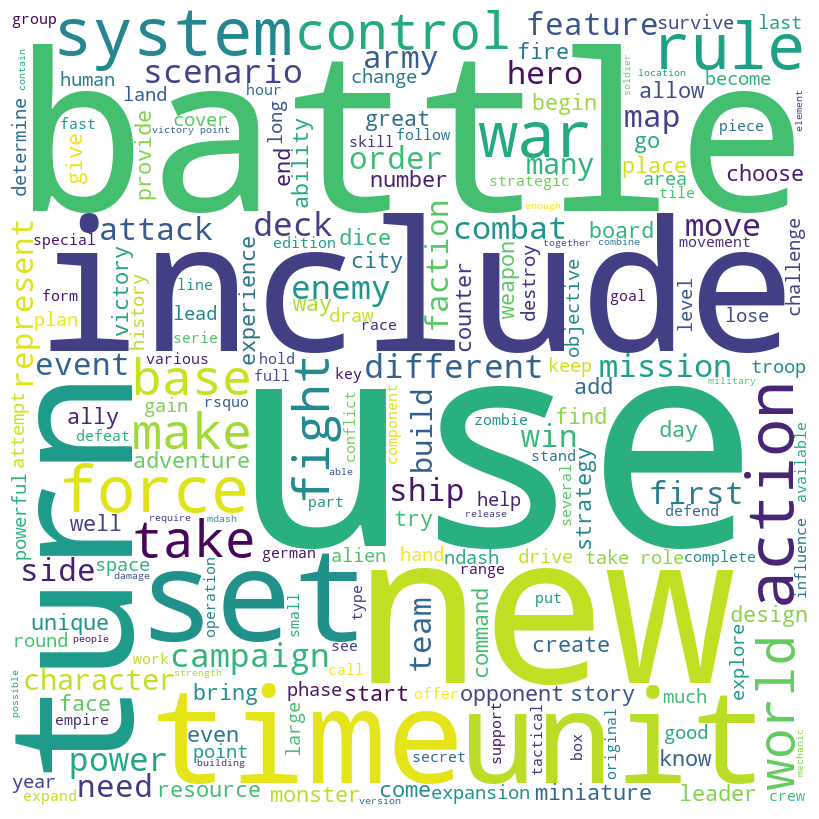

In [6]:
for i in range(6):
    plot_model(lda, plot = 'wordcloud', topic_num=f'Topic {i}')

In [7]:
evaluate_model(lda)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Frequency Plot', 'freque…